In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
import scipy
import datetime as dt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
VEG_PATH="vegetation/data/" # path for vegetation csv data
COVID_PATH="covidoxford/data/" # path for covid oxford csv files
CITIES_PATH="cities/data/" # path for indian cities csv files

## Analysis on 1 dergee x 1 degree resolution for India

In [41]:
cities_df=pd.read_csv(CITIES_PATH+"cities_1degx1deg.csv",error_bad_lines=False)
cities_df

b'Skipping line 164: expected 5 fields, saw 6\n'


,location,city,population,elevation,cities
0,10.5#79.5,Tanjore,1028745,26,Swamimalai#Negapatam#Pattukkottai#Thiruvaiyaru...
1,28.5#77.5,Delhi,19975171,216,Sonipat#Hapur#Dadri#Bulandshahr#Shahdara#Narel...
2,11.5#77.5,Tiruppur,1207126,265,Sivagiri#Ammapettai#Jalakandapuram#Sulur#Taram...
3,26.5#94.5,Jorhat,307188,520,Sibsagar#Jorhat#Tuensang#Amguri#Titabar#Mokokc...
4,28.5#79.5,Bareilly,2163356,183,Shergarh#Barkhera Kalan#Miranpur Katra#Shahaba...
5,27.5#78.5,Agra,3379711,174,Sasni#Chharra#Kasganj#Itimadpur#Hathras#Shamsa...
6,30.5#78.5,Dehra Dun,797859,789,Rudraprayag#Raiwala Bara#Uttarkashi#Dehra Dun#...
7,26.5#83.5,Gorakhpur,1437725,82,Rudarpur#Lar#Khalilabad#Chillupar#Bilthra#Muha...
8,16.5#81.5,Machilipatnam,1177469,13,Razole#Pallevada#Tanuku#Narasapur#Mandapeta#Pe...
9,24.5#75.5,Mandsaur,395564,403,Rawatbhata#Mandsaur#Rampura#Chechat#Shamgarh#R...


In [42]:
sc_df=pd.read_csv(VEG_PATH+"indian_cities_1degx1deg_vegetation.csv")
sc_df["metric"].unique()

array(['CMG 0.05 Deg 16 days NDVI', 'CMG 0.05 Deg 16 days EVI'],
      dtype=object)

In [43]:
metric_df=sc_df[(sc_df["metric"]=="CMG 0.05 Deg 16 days NDVI")&(sc_df["mean"]>-3000)&(~sc_df["mean"].isna())]

# Comparing post and pre lockdown weeks for 2020
While extracting data from granules, it was decided to take 2 months a week. For 2020 we are finding the difference of pre corona week and post corona week

In [44]:
week1="3.2020.week1"
week2="5.2020.week2"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    309.000000
mean     -18.702370
std       43.564124
min     -361.764706
25%      -36.453382
50%      -17.584122
75%        4.363187
max      228.767123
Name: diff, dtype: float64

In [45]:
print("--- cities where there was an increase of atleast 15% ---")
print(week_df[week_df["diff"]>=15]["city"].tolist())

--- cities where there was an increase of atleast 15% ---
['Khliehriat', 'Jamshedpur', 'Chamba', 'Hayuliang', 'Golaghat', 'Durgapur', 'Siliguri', 'Shimla', 'Tezpur', 'Coimbatore', 'Bengaluru', 'Leh', 'Guwahati', 'Tura', 'Kohima', 'Anantnag', 'Asansol', 'Dhulian', 'Joshimath', 'Bomdila', 'Mysore', 'Bongaigaon', 'Tawang', 'Jorhat', 'Jaigaon', 'Dimapur', 'Punch', 'Srinagar', 'Balasore']


Bangalore is a metro which has an increase in NDVI. Almost all other metros observe a significant decrease in NDVI

In [46]:
print("--- cities where there was an decrease of atleast 40% ---")
print(week_df[week_df["diff"]<=-40]["city"].tolist())

--- cities where there was an decrease of atleast 40% ---
['Varanasi', 'Panipat', 'Raipur', 'Jhansi', 'Bareilly', 'Warangal', 'Mirzapur', 'Churu', 'Gorakhpur', 'Rewa', 'Jhalawar', 'Amritsar', 'Satna', 'Delhi', 'Bahraigh', 'Alwar', 'Saugor', 'Sitapur', 'Chandigarh', 'Gorakhpur', 'Ramgundam', 'Bhopal', 'Gwalior', 'Shahjanpur', 'Ludhiana', 'Fyzabad', 'Morena', 'Padam', 'Allahabad', 'Indore', 'Hanumangarh', 'Baran', 'Fatehpur', 'Ganganagar', 'Kota', 'Jammu', 'Chhatarpur', 'Najafgarh', 'Lalitpur', 'Jhunjhunun', 'Akola', 'Kyelang', 'Shajapur', 'Guna', 'Agra', 'Bathinda', 'Chalisgaon', 'Jalandhar', 'Kargil', 'Raebareli', 'Ujjain', 'Gangapur', 'Mathura', 'Pahlgam', 'Kanpur', 'Phalodi', 'Arrah', 'Bettiah', 'Orai', 'Etawah']


A lot of decrease in vegetation is seen in areas if punjab and near by.

In [47]:
week_df[week_df["population"]>=2500000]["diff"].describe()

count    18.000000
mean    -23.868305
std      27.378012
min     -67.244947
25%     -49.142165
50%     -23.131269
75%      -2.958843
max      31.303289
Name: diff, dtype: float64

In [48]:
merged_data = pd.merge(sc_df, cities_df, on="location")

In [49]:
merged_data.head(3)

,location,week,metric,mean,sdev,city,population,elevation,cities
0,25.5#83.5,1.2019.week1,CMG 0.05 Deg 16 days NDVI,4796,745,Varanasi,2011821,81,Chandauli#Ghazipur#Sadat#Ramnagar#Zamania#Rasr...
1,25.5#83.5,1.2019.week1,CMG 0.05 Deg 16 days EVI,2831,617,Varanasi,2011821,81,Chandauli#Ghazipur#Sadat#Ramnagar#Zamania#Rasr...
2,25.5#83.5,1.2019.week2,CMG 0.05 Deg 16 days NDVI,5949,663,Varanasi,2011821,81,Chandauli#Ghazipur#Sadat#Ramnagar#Zamania#Rasr...


# Difference in NDVI values between the same week of 2020 and 2019

In [50]:
met_ndvi = 'CMG 0.05 Deg 16 days NDVI'
met_evi = 'CMG 0.05 Deg 16 days EVI'

In [51]:
week1="3.2019.week2"
week2="3.2020.week2"
met = met_ndvi
metric_data = merged_data[(merged_data['metric'] == met) & (merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]
week1_df = metric_data[(metric_data['week']==week1)]
week2_df = metric_data[(metric_data['week']==week2)]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])


week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])*100/week_df["mean_2019"]
week_df["diff"].describe()

count    310.000000
mean      13.852373
std       17.668600
min     -164.462810
25%        4.738934
50%       13.586427
75%       22.696739
max       78.043282
Name: diff, dtype: float64

In [52]:
week1="6.2019.week1"
week2="6.2020.week1"
met = met_ndvi
metric_data = merged_data[(merged_data['metric'] == met) & (merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]
week1_df = metric_data[(metric_data['week']==week1)]
week2_df = metric_data[(metric_data['week']==week2)]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])


week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])*100/week_df["mean_2019"]
week_df["diff"].describe()

count    309.000000
mean      24.105390
std       22.533631
min      -15.573456
25%        7.413039
50%       20.239570
75%       36.261261
max      150.270270
Name: diff, dtype: float64

# Comparison of percentage change between pre and post lockdown dates of 2019 and 2020

        diff_2019   diff_2020
count  309.000000  309.000000
mean   -15.100522  -15.984425
std     33.111477   23.410886
min   -164.429530 -119.607843
25%    -30.189673  -31.626264
50%    -11.456559  -13.042028
75%     -0.378616    1.245649
max    281.849315   73.630952


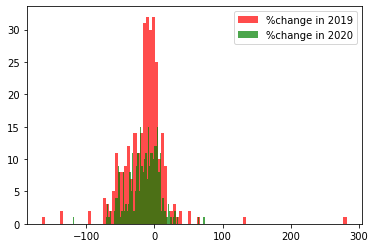

In [53]:
week1="3.2019.week1"
week2="4.2019.week2"
metric_data = merged_data[(merged_data['metric'] == met) & (merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]

week1_df=metric_data[metric_data["week"]==week1]
week2_df=metric_data[metric_data["week"]==week2]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]

week1="3.2020.week1"
week2="4.2020.week2"
week1_df=metric_data[metric_data["week"]==week1]
week2_df=metric_data[metric_data["week"]==week2]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.show()

         diff_2019    diff_2020
count  1240.000000  1240.000000
mean     47.861380    52.345343
std     128.520772   132.991834
min   -1358.671587 -1680.769231
25%      23.131412     5.485470
50%      46.213365    43.373033
75%      82.758621   101.146424
max     684.132420  1026.027397


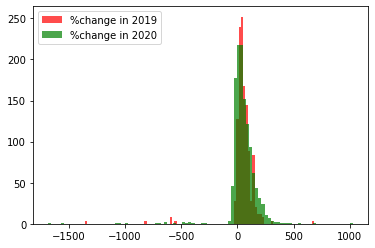

In [63]:
week1="3.2019.week1"
week2="8.2019.week2"
metric_data = merged_data[(merged_data['metric'] == met) & (merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]

week1_df=metric_data[metric_data["week"]==week1]
week2_df=metric_data[metric_data["week"]==week2]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]

week1="3.2020.week1"
week2="8.2020.week2"
week1_df=merged_data[merged_data["week"]==week1]
week2_df=merged_data[merged_data["week"]==week2]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)

plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.show()

# Weekwise NDVI average of all cities of 2019 and 2020


In [55]:
unique_weeks = merged_data[(merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]['week'].unique()
unique_weeks_2019 = []
unique_weeks_2020 = []
for each in unique_weeks:
    if each.split('.')[1] == '2019':
        unique_weeks_2019.append(each)
    elif each.split('.')[1] == '2020':
        unique_weeks_2020.append(each)

Plotting 24 point curve for 2019 and 2020.<br>
The curve for 2020 already higher than 2019. I was almost trying to follow 2019 curve. We can see from week 6 (march 2nd week) to 10 the vegetation index has increased than usual follow of 2019 curve. 

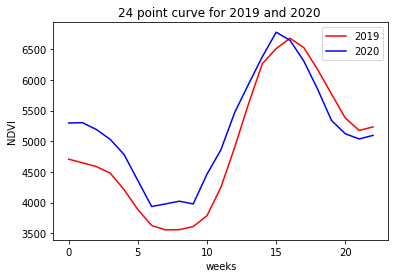

In [56]:
def get_month_plot(uni, met):
    points = []
    metric_data = merged_data[(merged_data['metric'] == met) & (merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]
    for each in uni:
        week_data = metric_data[metric_data['week'] == each]
        points.append(week_data['mean'].mean())
    return points


ndvi_veg_2019 = get_month_plot(unique_weeks_2019, met_ndvi)
ndvi_veg_2020 = get_month_plot(unique_weeks_2020, met_ndvi)

plt.plot(ndvi_veg_2019, color = 'red', label = '2019')
plt.plot(ndvi_veg_2020, color = 'blue', label = '2020')
plt.legend()
plt.xlabel('weeks')
plt.ylabel('NDVI')
plt.title('24 point curve for 2019 and 2020 ')
plt.show()

Taking difference across all weeks.<br>
Total 24 points as per month 2 points<br>

FOr every week we will get 310 points as theer are unique 310 cities as per 1 degree. Subtract values of every week of 2020 (310 points) from every week of 2019 (310 points) and have it's mean. Finally 24 points

In [57]:
def get_24_points(uni2019, uni2020, met):
    points_24 = []
    metric_data = merged_data[(merged_data['metric'] == met) & (merged_data['sdev']>-3000) & (merged_data['mean']>-3000)]
    for index, each in enumerate(uni2019):
        week_2019 = metric_data[metric_data['week'] == each]
        week_2019 = week_2019.reset_index(drop = True)
        week_2020 = metric_data[metric_data['week'] == uni2020[index]]
        week_2020 = week_2020.reset_index(drop = True)
        df = week_2020['mean'] - week_2019['mean']
        points_24.append(df.mean())
    return points_24


points_24 = get_24_points(unique_weeks_2019, unique_weeks_2020, 'CMG 0.05 Deg 16 days NDVI')

General week wise difference

We can see a dip approximately at 5th week (March 2nd week). 
My guess:- The change in vegetation takes a little time to show up. It's not one day process. So, around 10th (May 2nd week) week to 13th (July 1st week) week there is increase in vegetation as compared to 2019. After 15th week there is huge decrease in vegetation as compared to 2019. In those times there ware no strict lockdown at all the places. Additionally there were night curfew or some percentage mobilities were allowed at different places. 

The vegetation curve is already high from start of the 2019. So, we can not say every change in vegetation is due to covid-19 lockdown, as there are also other factors (previous years data, fires etc) for consideration 

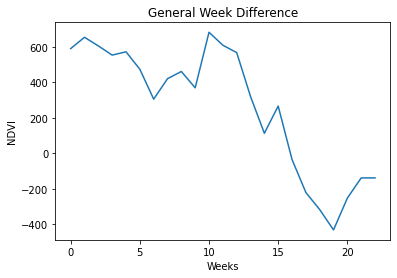

In [58]:
plt.plot(points_24)
plt.xlabel('Weeks')
plt.ylabel('NDVI')
plt.title('General Week Difference')
plt.show()
